## Introduction
Hey everyone! In this project, we're going to go through an end-to-end machine learning project with the goal of predicting if the passenger will be transferred to an alternate dimension or not.

Since we're trying to predict a class (`True` or `False`), this kind of problem is known as a classification problem.

The data we'll use is here from a [Kaggle competition](https://www.kaggle.com/competitions/spaceship-titanic/overview) - Spaceship Titanic, Predict which passengers are transported to an alternate dimension.

## Background & Problem Statement (Copied from Kaggle)
Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

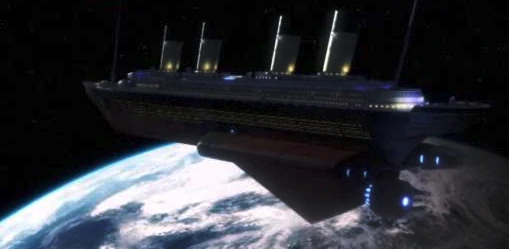

## Data

Looking at the [dataset from Kaggle](https://www.kaggle.com/competitions/spaceship-titanic/data).

There are 2 datasets:

* Train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data. The target variable is the `Transported` column
* Test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of `Transported` for the passengers in this set. 

## Evaluation

For this problem, [Kaggle has set the evaluation metric to being [classification accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy) (Classification Accuracy)](https://www.kaggle.com/competitions/spaceship-titanic/overview/evaluation).

To see how well our model is doing, we'll make our predictions on the test set, create a DataFrame with the results and submit our DataFrame (After converting to CSV) to Kaggle and get out the result.

## My Plan

* Downloading a the dataset
* Doing some EDA
* Imputing and scaling numeric features
* Encoding categorical columns as one-hot vectors
* Training a logistic regression model using Scikit-learn
* Evaluating a model using our test set

In [41]:
# Import Libraries

# 1. Libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Pre-Processing Libraries
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

print("Libraries Imported")

Libraries Imported


## Loading Data

In [42]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print("Data Loaded Successfully")

Data Loaded Successfully


## Column Descriptions
`PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

`HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.

`CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

`Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

`Destination` - The planet the passenger will be debarking to.

`Age` - The age of the passenger.

`RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

`VIP` - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

`Name` - The first and last names of the passenger.

`Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


In [43]:
# First 5 rows of dataset
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [44]:
# Get some info on our dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**Observation**
* There are a total of 8693 entries/data-points
* There are 14 columns, and 13 feature columns and one target variable `Transported`
* Our dataset has 3 datatypes
    * 6 Float Values
    * 7 Objects/String
    * 1 Bool (This is the target variable, we'll convert this to 0's & 1's)


In [45]:
# Some description of the numeric columns
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


**Observation**

* Age Column
    * Ages start from 0 and go till 79
    * 75% poeple are less than the age of `38`
    
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
    * The most poeple were billed at the FoodCourt
    * The cheapest luxury was the Room Service, which is pretty obvious why
    * These columns DON'T contradict with our common sense, so they are pretty good at they are
    
  

In [46]:
train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

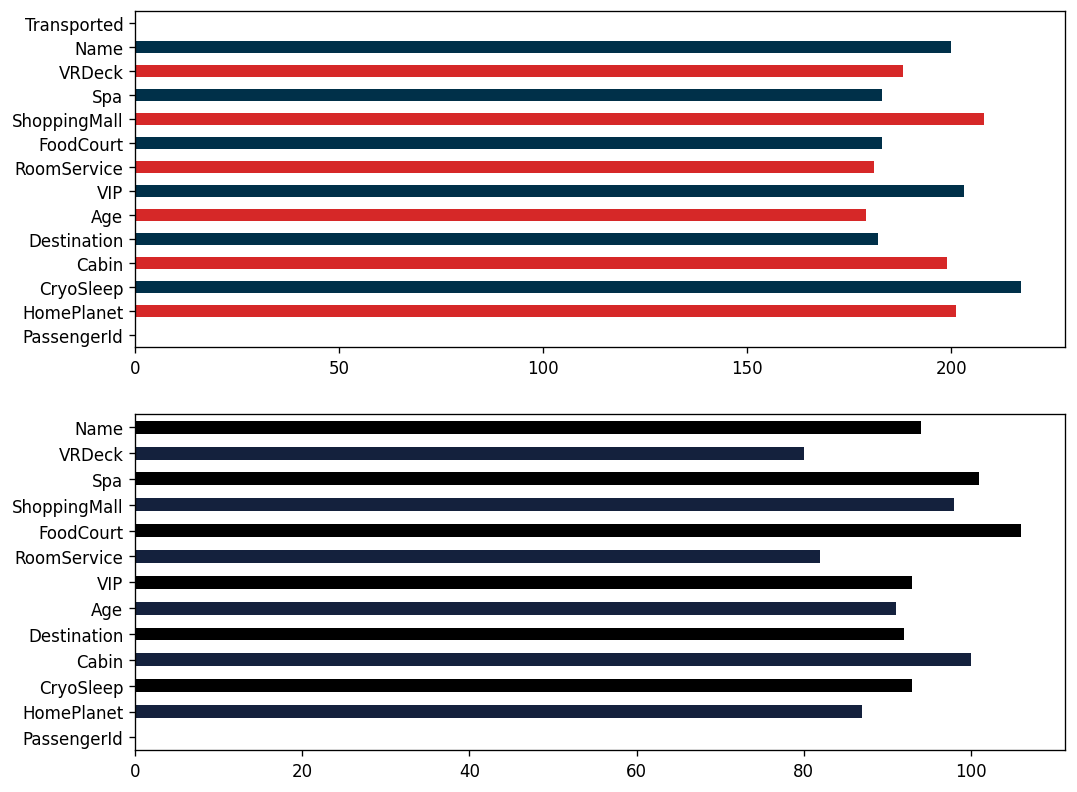

In [47]:
# Check for Null values
fig, ax = plt.subplots(2, 1, figsize=(10, 8), dpi=120)
train_df.isna().sum().plot(kind="barh", color=["#003049", "#d62828"], ax=ax[0]) # Train
test_df.isna().sum().plot(kind="barh", color=["#000000", "#14213d"], ax=ax[1])  # Test
plt.show()

## Doing Some EDA
* Exploring the numeric features (Histrograms)
* Exploring the categroical columns (Bar Charts, Scatter Plots)
* Exploring the relation of columns to getting Transported or NOT

### Exploring numeric features

In [48]:
# 1. What are the numeric columns
train_df.select_dtypes("Float64").columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [49]:
# 2. Let's plot the distribution of Age
px.histogram(data_frame = train_df, x="Age")

Age is pretty diversified....with a standard deviation of 14...most ages are correlated between 18-30.

In [50]:
# 3. Let's plot the distribution of the Room Service Bills
px.histogram(data_frame = train_df, x="RoomService")

Very clear....poeple spent very little on Room Service...some poeple were crazy enough to spend over $8000! Most poeple spent from 0-50 (dollars)

These must be outliers, and if this column isn't very useful...I might remove it before training the final model.

In [51]:
# 4. Let's plot the distribution of the  Bills
px.histogram(data_frame = train_df, x="FoodCourt")

Most poeple seem to spend no more than $100 on food...

In [52]:
# 5. Distribution of Shopping Mall Bills
px.histogram(data_frame = train_df, x="ShoppingMall")

Again, not many poeple paid for shopping. Most poeple spent in between 0-49 (dollars)

In [53]:
# 6. Distribution of Spa Bills
px.histogram(data_frame = train_df, x="Spa")

Similar to the Foodcourt...most poeple are between a 100 bucks.

In [54]:
# 7. Distribution of VRDeck Bills
px.histogram(data_frame = train_df, x="VRDeck")

Most poeple didn't pay a lot...less than $100 as seen from the plot.

**Observation**

The simple truth is that poeple didn't spend a lot of money on luxuries...as probably the ticket of the flight itself might be very expesive.

Also could be that most travellers were middle class and couldn't afford to spend a lot.

This could be another inference that many of these things like Room Service, Food Courts were already provided in decent quantity that passengers didn't have to spend thier own money (Something like packages included with the ticket).

### Exploring the Categorical Columns

In [55]:
# 1. What are the categorical columns?
train_df.select_dtypes("O").columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

In [56]:
def plot_value_counts(column_name):
    """
    Pass in the Categorical column name and this function will plot the value counts
    
    **Parameters**
        * column_name: Categorical Column Name
    """
    
    plt.figure(figsize=(8, 5), dpi=120)
    train_df[column_name].value_counts().plot(kind="bar", color=["#52796f", "#354f52"]).set(
    title=f"Value Counts of the {column_name} Column")
    plt.xticks(rotation=0)
    plt.show()

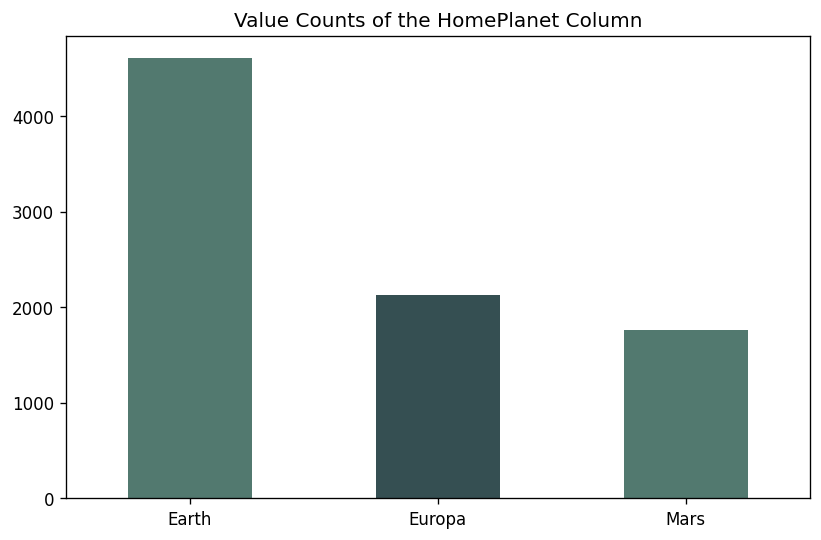

In [57]:
# 2. Value Counts of the Planet Column
plot_value_counts("HomePlanet")

**Observation**

* Most passengers are from Planet Earth (Home Sweeet Home)
* Then Comes Europa, followed by Mars

PS. Seems like Elon has to put a bit more effort if he needs to take humanity to **Mars** 😂

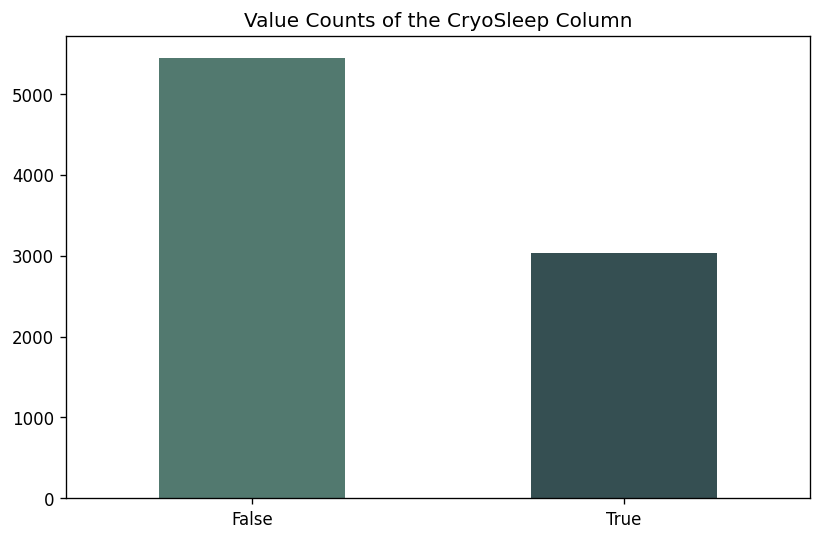

In [58]:
# 3. Value Counts of the CryoSleep Column
plot_value_counts("CryoSleep")

**Obeservation**

* Around 3200 poeple were confined in Cabins
* And around 5500 were clear, no confinement


I bet those who got confined prolly went mad and did something utterly stupid, which causes them imprisonment in thier OWN cabins...How funny is that!

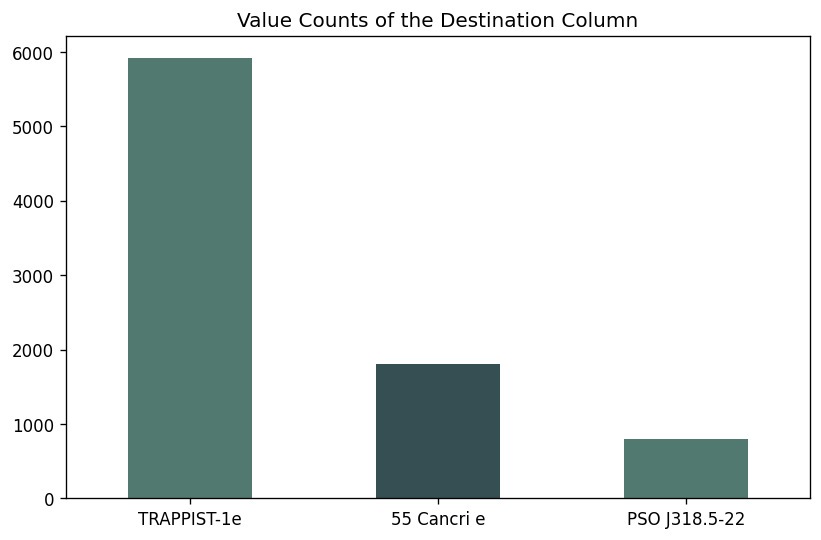

In [59]:
# 4. Value Counts of the Destination Column
plot_value_counts("Destination")

**Observation**

* There are 3 planets where poeple will be shifted to:
    * Trappist 1e
    * 55 Cancri e
    * PSO...
    
* Majority will move to Trappist 1e, this could be becuase of the following reasons:
    * As more poeple went from Earth...this must be closer, & as Mars isn't too far either, poeple living in both         planets must have gone to to Trappist 1e.
    
    * Trappist 1e could also be more devloped and could have a more freindly enviroment - similar to that of Planet Earth.

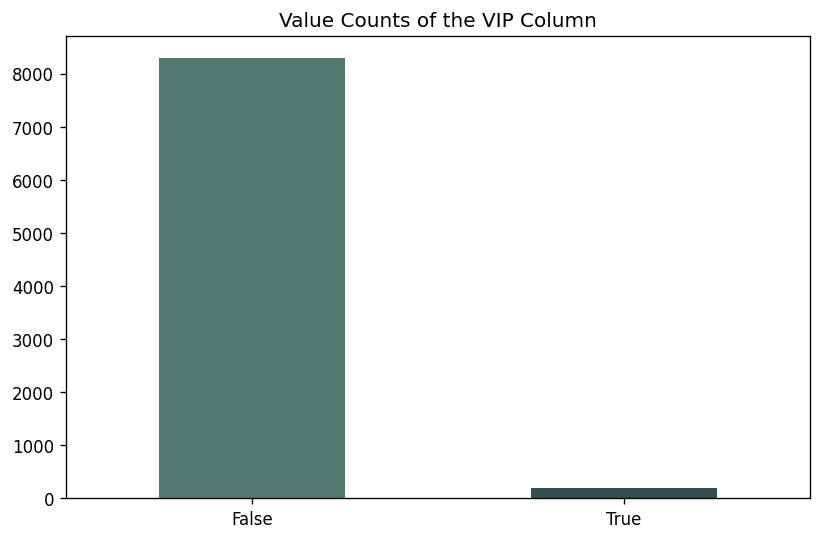

In [60]:
# 4. Value Counts of the VIP Column
plot_value_counts("VIP")

**Observation**

Simple, less than 200 poeple were VIP.

### Relation of columns to Transported

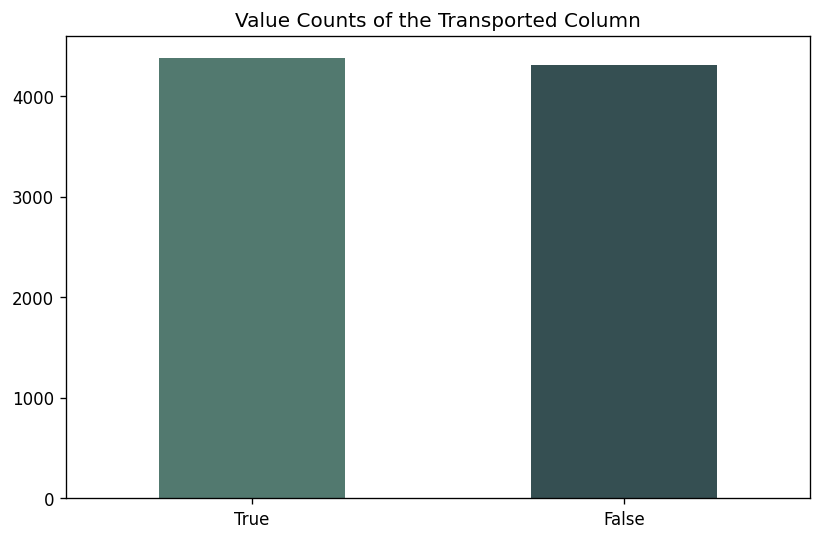

In [61]:
# Value Counts of the Transported Column
plot_value_counts("Transported")

Woah, this is amazing. There is an equal represention of both ends, this makes creating our ML model less prone to errors and outliers becuase of dataset imbalance.

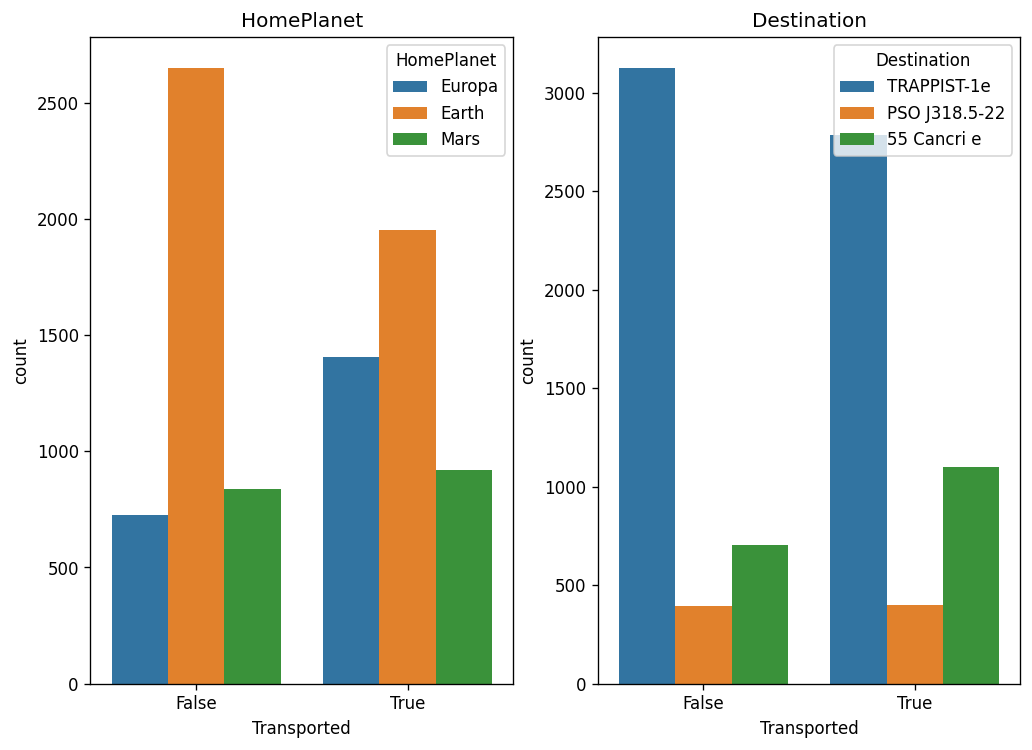

In [62]:
# Question: What is the realation of HomePlanet & Destination with Transported
fig, ax = plt.subplots(1, 2, figsize=(10, 7), dpi=120)
sns.countplot(x=train_df["Transported"], hue=train_df["HomePlanet"], ax=ax[0]).set(title="HomePlanet")
sns.countplot(x=train_df["Transported"], hue=train_df["Destination"]).set(title="Destination")
plt.show()

**Observation**

1. HomePlanet
    * Amazing more poeple who went from **Europa** were transported successfully, with minmal who weren't transported.
    * Most poeple on Earth were **NOT** transported, makes sense as there is NO better planet that the Blue Planet (i.e Earth)
    * Half off the popualation on **Mars** were transported successfully, and half of them weren't transported.

2. Destination
    * Most poeple who were supposed to reach Trappist weren't transported, it's a 60:40 ratio.
    * A 50:50 ratio b/w Planet PSO

In [63]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

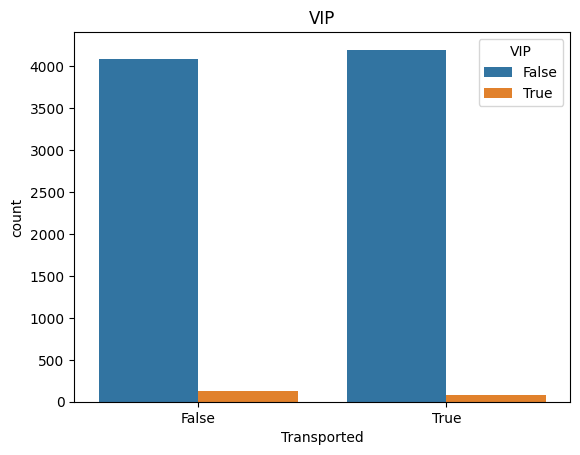

In [64]:
sns.countplot(x=train_df["Transported"], hue=train_df["VIP"]).set(title="VIP")
plt.show()

**Observation**
* Pretty straighforward...as most poeple were NON VIP, so there's no comparison here.
* Atleast from what we can see here, is that most VIP's weren't transported at all.
    


Well, that's enough EDA for once, isn't it! So now let's move on towards the pre-processing section, then forwarding towards the modelling section

# Data Preprocessing
Whenever dealing with tabular data such as this one, we tend to find all types of data (in terms of data types), we find integers, floats, objects and booleans.

If we just try to directly fit an ML model on the data, we'll be UNABLE to train a machine learning model. So to prevent this from happening, we have to convert the string/object columns to numeric colums via `OneHotEncoding`.

Then we also need to do some Feature Engineering, meaning to create some columns. In this case the `Cabin` column if some interest. If you notice at the end of each Cabin number there is either P or S, so we'll convert `S` & `P` in `Cabin` to `StarBoard` and `Port` respectively.

But before we do anything we'll fill in the missing values, then do the other stuff mentioned above.

And one thing to note is that we will not be intefering with the main dataset, we'll create a copy of it.

In [65]:
temp_df = train_df.copy()
temp_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


### 1. Impute Values

By imputing I mean, filling in the **null/missing** values. There are many missing values in the dataset, as we have seen in the start of the notebook, so yeah! Let's fill in both the numeric and categorical (string/object) columns.

We'll do this for both the **test** and **train** set.

In [66]:
# What are the numeric columns, and their sum of missing values
temp_df.select_dtypes("float").isna().sum()

Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

Well, I'm thinking of converting the missing values all columns to the most occuring value...AKA `mode`.


How did I find the most occuring value you may ask? Here's how, just change the `column_name` to a proper column.

`temp_df.column_name.value_counts(ascending=False)` (For a specific column)

In [67]:
# Checking for most frequent values (OBJECT)
temp_df.select_dtypes("float").mode()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,24.0,0.0,0.0,0.0,0.0,0.0


In [68]:
imputer_startegy = SimpleImputer(strategy='most_frequent')
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
object_features = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP','Name']

In [69]:
imputer = ColumnTransformer([
    ("num_imputer", imputer_startegy, numerical_features),
    ("object_imputer", imputer_startegy, object_features),
])

# Fill train and test values separately
temp_df = imputer.fit_transform(temp_df)
test_df = imputer.fit_transform(test_df)

# Create the DataFrame
temp_df = pd.DataFrame(temp_df, columns=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 
                                         'Spa', 'VRDeck', 'PassengerId', 'HomePlanet', 'CryoSleep', 
                                         'Cabin', 'Destination', 'VIP','Name'])

test_df = pd.DataFrame(temp_df, columns=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 
                                         'Spa', 'VRDeck', 'PassengerId', 'HomePlanet', 'CryoSleep', 
                                         'Cabin', 'Destination', 'VIP','Name'])

In [70]:
# Check for NULL values - NO null(s)
test_df.isna().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
VIP             0
Name            0
dtype: int64

In [71]:
# As Transported column was removed, let's add it back.
transported = train_df.Transported
temp_df['Transported'] = transported
temp_df.head()

# No need for the test set, as there is NO target column

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy,False
1,24.0,109.0,9.0,25.0,549.0,44.0,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent,False
4,16.0,303.0,70.0,151.0,565.0,2.0,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines,True


### 2. Feature Engineering

Just one thing needs to be done, that is to make the **Starboard** and **Pilot** thing. Should just take a minute.

In [72]:
temp_df.Cabin

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

In [73]:
# Re-Arranging columns to their orignal format
temp_df = temp_df[['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported']]

In [74]:
# Get the value counts of the P (Pilot Spot)
temp_df.Cabin.str.contains("P").value_counts()

False    4487
True     4206
Name: Cabin, dtype: int64

In [75]:
# Make a column **SPOT** per condition
temp_df.loc[temp_df["Cabin"].str.contains("P"), 'Spot'] = "Pilot" if True else "StarBoard"
temp_df.loc[temp_df["Cabin"].str.contains("S"), 'Spot'] = "StarBoard" if True else "Pilot"

# Testing Set
test_df.loc[temp_df["Cabin"].str.contains("P"), 'Spot'] = "Pilot" if True else "StarBoard"
test_df.loc[temp_df["Cabin"].str.contains("S"), 'Spot'] = "StarBoard" if True else "Pilot"

In [76]:
# Check the value counts - which are similar to the value counts 2 cells above! Means we did it correctly
temp_df.Spot.value_counts()

StarBoard    4487
Pilot        4206
Name: Spot, dtype: int64

In [77]:
# Let's remove some un-necessary columns like Name and Cabin
temp_df.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)
test_df.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)

There we go, completed ina giffy!

Now let's move on towards **OneHotEncoding**.

### 3. OneHotEncoding

One last thing before we can move to the ML section is to covert our string/categorical columns to numbers, as it is required. You CANNOT pass string values into an ML algorithm. So let's get to it!

In [78]:
# Converting numeric columns to float
num_cols = train_df.select_dtypes("float").columns
for col in num_cols:
    temp_df[col] = temp_df[col].astype("float64") # Traning Set
    test_df[col] = test_df[col].astype("float64") # Test Set

In [79]:
# Creating some variables for easy use
categorical_cols = temp_df.select_dtypes('object').columns.tolist()
numeric_cols = temp_df.select_dtypes('float').columns.tolist()

# Init the encoder object
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit the encoder
encoder.fit(temp_df.select_dtypes("object"))

# Get the Encoded column names
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

# Transform both train and test sets.
temp_df[encoded_cols] = encoder.transform(temp_df[categorical_cols])
test_df[encoded_cols] = encoder.transform(test_df[categorical_cols])

Oh yeah! That's more like it. Everything up and ready for Modelling! Let's go my freind!

Now as we have converted the **object** columns to OneHotEncoded vectors, we'll use these + the numeric colums. We won't be deleting the **object** columns though.

## Modelling - Machine Learning

We'll try out different algorithms like
1. Logistic Regression
2. Naive Bayes
3. K-Nearest Neighbors
4. Decision Tree
5. Support Vector Machines

Once, we've done training, we'll take the top 3 algorithms and hyperparamter tune them. Once that is done, we'll make our final predictions on our test set.

### 1. Creating Train & Validation Sets
We'll take around 20% of the training set, and use it as the validation set. This is what we'll use to validate our model and tune our model, before we go the real predictions & submission to Kaggle.

In [98]:
df_temp_train = temp_df[:6700]
df_temp_valid = temp_df[6700:]

In [97]:
df_temp_train.shape, df_temp_valid.shape

((7000, 24), (1693, 24))